## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "./Resources/05-Matplotlib_Homework_Instructions_Pymaceuticals_data_Mouse_metadata.csv"
study_results_path = "./Resources/05-Matplotlib_Homework_Instructions_Pymaceuticals_data_Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")

# Display the data table for preview
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
total_mice = len(mouse_data["Mouse ID"].unique())
total_mice

249

In [3]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data.duplicated().sum()

1

In [4]:
df = mouse_data.rename(columns={"Mouse ID":"MouseID", "Tumor Volume (mm3)": "TumorVolume"})

In [5]:
df.loc[df.duplicated(keep= False),:]

,MouseID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,TumorVolume,Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df[df.MouseID != 'g989']

,MouseID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,TumorVolume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
df["MouseID"].nunique()

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_mouse_data = mouse_data[["Drug Regimen", "Tumor Volume (mm3)"]]

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

group_by_data = summary_mouse_data.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_data = group_by_data["Tumor Volume (mm3)"].mean()
median_data = group_by_data["Tumor Volume (mm3)"].median()
variance_data = group_by_data["Tumor Volume (mm3)"].var()
standard_deviation = group_by_data["Tumor Volume (mm3)"].std()
sem = group_by_data["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary dataframe. 
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

summary_data = pd.DataFrame({
                "Mean" : mean_data,
                "Median": median_data,
                "Variance": variance_data,
                "Standard Deviation": standard_deviation,
                "SEM": sem
                
})

summary_data["Mean"] = summary_data["Mean"].map("{:.2f}".format)
summary_data["Median"] = summary_data["Median"].map("{:.2f}".format)
summary_data["Variance"] = summary_data["Variance"].map("{:.2f}".format)
summary_data["Standard Deviation"] = summary_data["Standard Deviation"].map("{:.2f}".format)
summary_data["SEM"] = summary_data["SEM"].map("{:.2f}".format)

summary_data


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

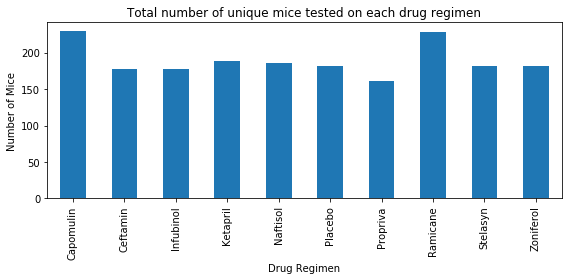

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drugs_grouped = df.groupby("Drug Regimen").MouseID.count()
drugs_grouped

summary_bar = drugs_grouped.plot(kind = "bar", figsize = (8,4))
plt.title("Total number of unique mice tested on each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.tight_layout()


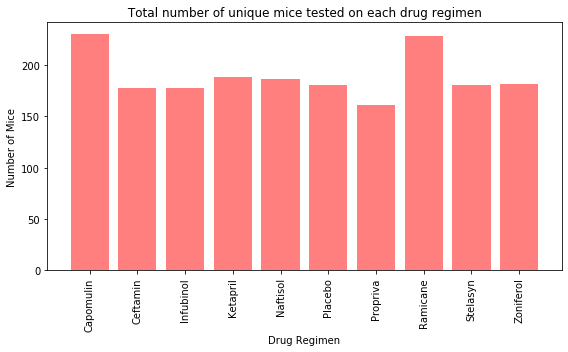

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(summary_data))
tick_location = [value for value in x_axis]

plt.figure(figsize = (8,5))
plt.bar(x_axis, drugs_grouped, color='red', alpha=0.5, align="center")
plt.xticks(tick_location, list(drugs_grouped.index), rotation = "vertical")

plt.title(" Total number of unique mice tested on each drug regimen ")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.tight_layout()
plt.show()


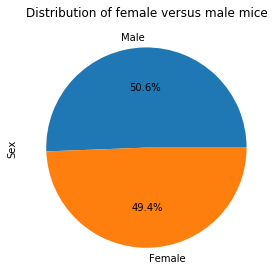

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender = df["Sex"].value_counts()
plt.figure()
mice_gender.plot(kind = "pie", autopct = "%1.1f%%")
plt.title("Distribution of female versus male mice")

plt.tight_layout()



Text(0.5, 1.0, 'Distribution of female versus male mice')

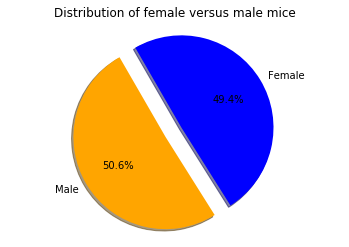

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode = (.2,0)
colors = ["orange", "blue"]
labels = mice_gender.index.values

plt.pie(mice_gender.values, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")
plt.title("Distribution of female versus male mice")


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#regimen= []
#regimen.append(drugs_grouped.index)

# Start by getting the last (greatest) timepoint for each mouse
Tumor_volume_max = df.groupby("Drug Regimen").TumorVolume.max()
Tumor_volume_max

# Merge this group df with the originalz dataframe to get the tumor volume at the last timepoint
volume_merge = pd.merge(Tumor_volume_max, df, how = "outer", on = "Drug Regimen")
print(volume_merge)

     Drug Regimen  TumorVolume_x MouseID     Sex  Age_months  Weight (g)  \
0       Capomulin      48.158209    s185  Female           3          17   
1       Capomulin      48.158209    s185  Female           3          17   
2       Capomulin      48.158209    s185  Female           3          17   
3       Capomulin      48.158209    s185  Female           3          17   
4       Capomulin      48.158209    s185  Female           3          17   
...           ...            ...     ...     ...         ...         ...   
1888    Zoniferol      73.324432    w575  Female          16          28   
1889    Zoniferol      73.324432    x613  Female           2          29   
1890    Zoniferol      73.324432    x613  Female           2          29   
1891    Zoniferol      73.324432    x613  Female           2          29   
1892    Zoniferol      73.324432    x613  Female           2          29   

      Timepoint  TumorVolume_y  Metastatic Sites  
0             0      45.000000      

In [39]:
# Put treatments into a list for for loop (and later for plot labels)
list_of_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumor_vol_data = volume_merge["TumorVolume_y"]
quartiles = tumor_vol_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
      
  # Locate the rows which contain mice on each drug and get the tumor volumes
vol_merge = volume_merge[["MouseID", "Drug Regimen", "TumorVolume_y"]]
vol_merge = vol_merge.groupby(["MouseID", "TumorVolume_y"])    
volume_df = volume_merge["TumorVolume_y"].sum()
      
    # add subset 
subset = tumor_vol_data.sample(90) 
    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
    

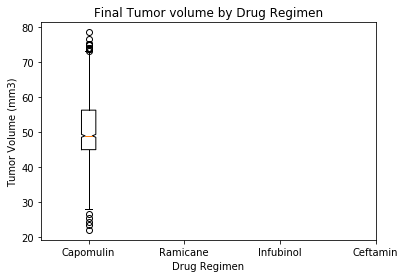

In [40]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
for data in vol_merge:
    tumor_data.append("TumorVolume_y")

fig1, ax = plt.subplots()
ax.set_title('Final Tumor volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(tumor_vol_data,tumor_data)
plt.xticks([1,2,3,4],list_of_drugs)

plt.show()

## Line and Scatter Plots

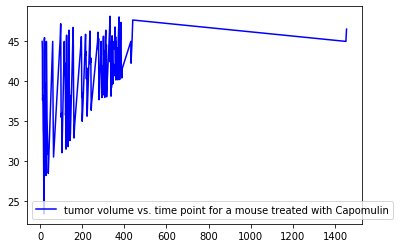

In [52]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Capomulin = df.loc[(df["Drug Regimen"] == "Capomulin"),:]

timepoint = Capomulin["Timepoint"]
tumor_volume = Capomulin["TumorVolume"]

capomulin_line, = plt.plot( tumor_volume, color="blue", label="tumor volume vs. time point for a mouse treated with Capomulin" )

# Create a legend for our chart
plt.legend(handles=[capomulin_line], loc="best")

# Show the chart
plt.show()

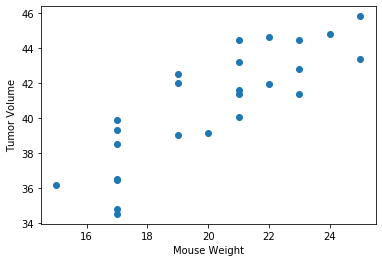

In [55]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_weight = Capomulin.groupby(Capomulin["MouseID"])["Weight (g)"].mean()
tumor_volume = Capomulin.groupby(Capomulin["MouseID"])["TumorVolume"].mean()

# Create Scatter Plot with values calculated above
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")
plt.show() 

## Correlation and Regression

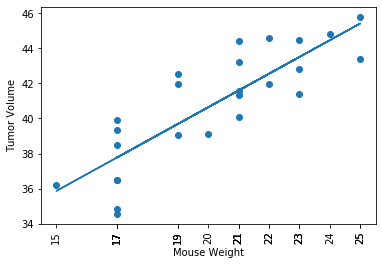

The correlation between weight and tumor value is 0.8419363424694717


In [63]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
slope, int, r, p, std_err = st.linregress(mouse_weight, tumor_volume)
fit = slope * mouse_weight + int

plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")
plt.plot(mouse_weight,fit,"-")
plt.xticks(mouse_weight, rotation=90)
plt.show()

coff = st.pearsonr(mouse_weight,tumor_volume)[0]
print(f'The correlation between weight and tumor value is {coff}')